<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/6_Cifar10_ANN_timeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(x_train,y_train), (x_test,y_test)= tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [7]:
x_train.shape, x_test.shape


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
x_train[0].shape

(32, 32, 3)

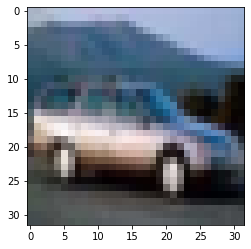

In [9]:
plt.imshow(x_train[4])

In [10]:
y_train.shape
y_train[4]  # 1= automobile 

array([1], dtype=uint8)

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
classes[y_train[4][0]]

'automobile'

In [14]:
x_train_scaled= x_train/ 255 
x_test_scaled= x_test/ 255 
x_train_scaled.shape

(50000, 32, 32, 3)

In [15]:
y_train[0:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [18]:
y_train_categorical= keras.utils.to_categorical(y_train, num_classes=10 , dtype='float32')

y_train_categorical[:6]  #ONE HOT ENCODING 

y_test_categorical= keras.utils.to_categorical(y_test, num_classes=10 , dtype='float32')

y_test_categorical[:6]  #ONE HOT ENCODING 

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [20]:
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(32,32,3)),
                         keras.layers.Dense(3000, activation ='relu'),
                         keras.layers.Dense(1000, activation ='relu'),
                         keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8114 - accuracy: 0.3543
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6244 - accuracy: 0.4260
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5394 - accuracy: 0.4564
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4783 - accuracy: 0.4788
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4324 - accuracy: 0.4967
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3864 - accuracy: 0.5133
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3498 - accuracy: 0.5237
Epoch 8/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3147 - accuracy: 0.5394
Epoch 9/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2834 - accuracy: 0.5511
Epoch 10/50
1563/1563 [==============================] - 12s 8ms/step - l

In [23]:
pred=model.predict(x_test_scaled)[0]
pred

array([4.9402174e-01, 4.5287675e-01, 8.9409935e-01, 9.9966919e-01,
       9.3392211e-01, 6.2661850e-01, 4.4209659e-02, 3.8201685e-04,
       4.6309486e-01, 8.6524576e-02], dtype=float32)

In [24]:
classes[np.argmax(pred)]

'cat'

In [27]:
classes[y_test[0][0]]

'cat'

In [29]:
model.evaluate(x_test_scaled, y_test_categorical)

313/313 [==============================] - 2s 5ms/step - loss: 1.5543 - accuracy: 0.5710


[1.5543127059936523, 0.5709999799728394]

In [31]:
def get_model():
    model = keras.Sequential([
                            keras.layers.Flatten(input_shape = (32, 32, 3)),
                            keras.layers.Dense(3000, activation = 'relu'),
                            keras.layers.Dense(1000, activation = 'relu'),
                            keras.layers.Dense(10, activation = 'sigmoid'),
    ])

    model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [32]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 102s 65ms/step - loss: 1.8118 - accuracy: 0.3536
1 loop, best of 1: 1min 42s per loop


In [33]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 13s 8ms/step - loss: 1.8108 - accuracy: 0.3549
1 loop, best of 1: 13.3 s per loop
